In [349]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [350]:
class Constants:
    """
    Important Constants for Calculations
        c = Speed of light (m/s)

        Mu0 = permeability of free space in H/m

        MuB = Bohr magneton in J/T

        Epsilon0 = permittivity of free space in F/m

        amu = atomic mass unit in kg

        HBar = reduced planck's constant in Js

        kB = Stegan-Boltzman constant in J/K

        h = planck's constat in Js

        a0 = bohr radius in dm

        g = gravitational acceleration in m/s^2

        Lamdba1064 = 1064nm in m
    """

    #Constants
    c = 2.99792458e8
    Mu0 = 4*np.pi*1e-7
    MuB = 9.2740095e-24
    Epsilon0 = 8.854187e-12
    amu = 1.66053906892e-27
    HBar = 1.054571628e-34
    kB = 1.3806504e-23
    h = 6.62607015e-34
    a0 = 0.52917720859e-10
    g = 9.807 
    
    #Conversions
    Lambda1064 = 1064e-9
    Lambda632 = 632e-9
    Lambda635 = 635e-9

# Atomic Properties

In [351]:
class Cs133:
    """This class stores atomic properties of cesium-133."""
    mass = 132.905451931 * Constants.amu  # atomic mass in kg
    aBB = 277 # Cs-Cs scattering length in bohr radii

    class GS: #ground state
        g_j = 2.002540261 #fine structure landé g-factor
        aHF = Constants.h * 2.2981579425e9 #hyperfine structure constant in J

    class D1: #D1 Transition
        wavelength = 894.59295987e-9  # wavelength (in vaccum) in m
        Gamma = 2 * np.pi * 4.575e6  # decay rate in rad/s
    
    class D2: #D2 Transition
        wavelength = 852.34727582e-9  # wavelength (in vacuum) in m
        Gamma = 2 * np.pi * 5.234e6  # decay rate in rad/s

In [352]:
class Li6:
    """This class stores atomic properties of lithium-6."""
    mass = 6.0151214 * Constants.amu  # atomic mass in kg

    class GS: #ground state
        g_j = 2.0023010 #Total electronic g-factor 
        aHF = Constants.h * 152.1368407e6 # hyperfine structure constrant in J

    class D1: #D1 transition
        wavelength = 670.992421e-9 # wavelength in m
        Gamma = 2 * np.pi * 5.8724e6 # decay rate in rad/s
    
    class D2: #D2 transition
        wavelength = 670.992421e-9 # wavelength in m
        Gamma = 2 * np.pi * 5.8724e6 # decay rate in rad/s

# Helper Functions

In [353]:
def partial_second_derivative(fun, r:list, dir:str, h:float):
    """
    Function for computing the second partial derivative of the potential with respect to a given direction using the central finite difference method

    inputs:
        fun (function): the input function
        r (list): position x,y, and z in microns
        dir (string): direction, must be x, y, or z
        h (float): step size for differentiation (smaller is better)
    
    returns (float): the partial 2nd derivative at the given point in Hz/ m^2
     
    """
    deriv = None

    if dir == "x":
        x = r[0]
        x1 = x + 2*h
        x2 = x + h
        x3 = x - h
        x4 = x - 2*h

        y = r[1]
        z = r[2]

        r1 = [x1, y, z]
        r2 = [x2, y, z]
        r3 = [x3, y, z]
        r4 = [x4, y, z]

        deriv = (-fun(r1) + 16*fun(r2) - 30*fun(r) + 16*fun(r3) - fun(r4)) / (12*h**2)

    if dir == "y":
        x = r[0]

        y = r[1]
        y1 = y + 2*h
        y2 = y + h
        y3 = y - h
        y4 = y - 2*h

        z = r[2]

        r1 = [x, y1, z]
        r2 = [x, y2, z]
        r3 = [x, y3, z]
        r4 = [x, y4, z]

        deriv = (-fun(r1) + 16*fun(r2) - 30*fun(r) + 16*fun(r3) - fun(r4)) / (12*h**2)

    if dir == "z":
        x = r[0]
        y = r[1]

        z = r[2]
        z1 = z + 2*h
        z2 = z + h
        z3 = z - h
        z4 = z - 2*h

        r1 = [x, y, z1]
        r2 = [x, y, z2]
        r3 = [x, y, z3]
        r4 = [x, y, z4]

        deriv = (-fun(r1) + 16*fun(r2) - 30*fun(r) + 16*fun(r3) - fun(r4)) / (12*h**2)

    return deriv

In [354]:
def plot_contour(fun, ranges, const_val, const_coord, labels, cmap_color):
    """
    Function for making a 2d contour plot of a 3d scalar function by setting one of the coordinates to a constant value
    
    inputs:
        - func (def): 3d scalar function for plotting
        - ranges (list): a list of ranges for plotting in microns (assumes that range is symmetric about the origin)
            - must be [x_range, y_range], [x_range, z_range], or [y_range, z_range]
            - ex: if x_range = 100, then function generates a numpy array from -100e-6 to 100e-6 in increments of 1e-6
        - const_val (float|int): constant value being set in m
        - const_coord (str): coordinate being fixed - must be "x", "y", or "z"
        - params (tuple): parameters for the function being plotted
        -labels (list): [x_axis_label, y_axis_label, title, colorbar_label]
        - cmap_color: color for contour plot (see matplotlib for list of colors)
    
    returns (plot): contour plot of function

    """

    #Get coordinates
    range_1 = ranges[0]
    increment_val_1 = range_1/100
    label_1 = labels[0]

    range_2 = ranges[1]
    increment_val_2 = range_2/100
    label_2 = labels[1]

    title = labels[2]
    color_bar_title = labels[3]

    #determine coordinate plane
    if const_coord == "x":
        x = np.full((201, 1), const_val)
        y = np.arange(-range_1*1e-6, range_1*1e-6, increment_val_1*1e-6)
        z = np.arange(-range_2*1e-6, range_2*1e-6, increment_val_2*1e-6)

        #generate meshgrid for graphing
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

        X = X[0, :, :]
        Y = Y[0, :, :]
        Z = Z[0, :, :]

    if const_coord == "y":
        x = np.arange(-range_1*1e-6, range_1*1e-6, increment_val_1*1e-6)
        y = np.full((201, 1), const_val)
        z = np.arange(-range_2*1e-6, range_2*1e-6, increment_val_2*1e-6)

        #generate meshgrid for graphing
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

        X = X[:, 0, :]
        Y = Y[:, 0, :]
        Z = Z[:, 0, :]

    if const_coord == "z":
        x = np.arange(-range_1*1e-6, range_1*1e-6, increment_val_1*1e-6)
        y = np.arange(-range_2*1e-6, range_2*1e-6, increment_val_2*1e-6)
        z = np.full((201, 1), const_val)

        #generate meshgrid for graphing
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

        X = X[:, :, 0]
        Y = Y[:, :, 0]
        Z = Z[:, :, 0]

    #get position matrix
    r = [X, Y, Z]

    #get vals for plotting
    fun_vals = fun(r)

    fig, ax = plt.subplots(layout = 'constrained')

    #make plots
    if const_coord == 'x':
        plot = ax.contourf(Y*1e6, Z*1e6, fun_vals, 10, cmap=cmap_color)
    
    if const_coord == "y":
        plot = ax.contourf(X*1e6, Z*1e6, fun_vals, 10, cmap=cmap_color)

    if const_coord == "z":
        plot = ax.contourf(X*1e6, Y*1e6, fun_vals, 10, cmap=cmap_color)

    #set tile and label
    ax.set_title(title)
    ax.set_xlabel(label_1)
    ax.set_ylabel(label_2)

    #add color bar
    cbar = fig.colorbar(plot)
    cbar.ax.set_ylabel(color_bar_title)
    

In [355]:
def plot_total_potential(potens, ranges, const_vals, main_title, trap=None):
    """
    Function for generating 1D plots of the total potential (dipole + mag + grav)

    inputs:
        - poten (list): list of functions for the total potentials of cs and li
        - ranges (list): ranges for plotting - assumes that ranges are symmetric about the origin (ex: x_range=100e-6, gives x array from -100e-6 to 100e-6)
        - const_vals (list): constant values for the other two coordinates in m (ex: [0,0] if you want f(x, 0, 0))
        - main_title (str): Title of the figure
        - trap (list): conditions of trap [cs_trap, li_trap, chem_potentials] each trap contains the min and max potentials, the max position, chem_potens are in kHz
    
    returns (plot): six plots - potentials in x, y, and z for cesium and lithium

    """
    #get ranges
    x_range = ranges[0]
    y_range = ranges[1]
    z_range = ranges[2]

    #get constant values
    cs_const = const_vals[0]
    li_const = const_vals[1]

    cs_x0 = cs_const[0]
    cs_y0 = cs_const[1]
    cs_z0 = cs_const[2]

    li_x0 = li_const[0]
    li_y0 = li_const[1]
    li_z0 = li_const[2]

    #define x, y, z vals
    x = np.arange(-x_range, x_range, x_range/1000)
    y = np.arange(-y_range, y_range, y_range/1000)
    z = np.arange(-z_range, z_range, z_range/1000)
    
    #define positions for plotting
    cs_r1 = [x, cs_y0, cs_z0]
    cs_r2 = [cs_x0, y, cs_z0]
    cs_r3 = [cs_x0, cs_y0, z]

    li_r1 = [x, li_y0, li_z0]
    li_r2 = [li_x0, y, li_z0]
    li_r3 = [li_x0, li_y0, z]

    #get vals for cesium in kHz
    cs_poten = potens[0]
    cs_vals_1 = cs_poten(cs_r1) * 1e-3
    cs_vals_2 = cs_poten(cs_r2) * 1e-3
    cs_vals_3 = cs_poten(cs_r3) * 1e-3

    #get vals for lithium
    li_poten = potens[1]
    li_vals_1 = li_poten(li_r1) * 1e-3
    li_vals_2 = li_poten(li_r2) * 1e-3
    li_vals_3 = li_poten(li_r3) * 1e-3

    #create figure
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(main_title)

    #cesium plots
    axs[0,0].plot(x*1e6, cs_vals_1)
    axs[0,1].plot(y*1e6, cs_vals_2)
    axs[0,2].plot(z*1e6, cs_vals_3)

    #lithium plots
    axs[1,0].plot(x*1e6, li_vals_1)
    axs[1,1].plot(y*1e6, li_vals_2)
    axs[1,2].plot(z*1e6, li_vals_3)

    #plot trap in z if trap is given
    if trap is not None:
        cs_trap = trap[0]
        li_trap = trap[1]
        chem_potens = trap[2]

        cs_min_poten = cs_trap[0]
        cs_max_poten = cs_trap[1]
        cs_max_pos = cs_trap[2]

        cs_z1 = cs_max_pos[2]

        li_min_poten = li_trap[0]
        li_max_poten = li_trap[1]
        li_max_pos = li_trap[2]

        li_z1 = li_max_pos[2]

        axs[0,2].scatter(cs_z0*1e6, cs_min_poten)
        axs[0,2].scatter(cs_z1*1e6, cs_max_poten)

        cs_threshold = cs_min_poten + chem_potens[0]
        axs[0,2].fill_between(z*1e6, cs_vals_3, cs_threshold, where=(z > cs_z1) & (z < -cs_z1) & (cs_vals_3 < cs_threshold), alpha=0.4)

        axs[1,2].scatter(li_z0*1e6, li_min_poten)
        axs[1,2].scatter(li_z1*1e6, li_max_poten)

        li_threshold = li_min_poten + chem_potens[1]
        axs[1,2].fill_between(z*1e6, li_vals_3, li_threshold, where=(z > li_z1) & (z < -li_z1) & (li_vals_3 < li_threshold), alpha=0.4)
        
        #add inset plot for cesium
        cs_zoom_min = cs_min_poten * 1e1
        cs_zoom_vals = cs_vals_3 * 1e1
        cs_zoom_threshold = cs_threshold *1e1

        axins = axs[0,2].inset_axes([0.57, 0.5, 0.3, 0.3])
        axins.set_xlim(cs_z0*1e6 - 5, cs_z0*1e6 + 5)
        axins.set_ylim(cs_zoom_min - 1, cs_zoom_min + 5)

        axins.plot(z*1e6, cs_zoom_vals)

        axins.fill_between(z*1e6, cs_zoom_vals, cs_zoom_threshold, where=(z > cs_z1) & (z < -cs_z1) & (cs_zoom_vals < cs_zoom_threshold), alpha=0.4)
        axins.tick_params(labelleft=False, labelbottom=False)
        axins.set_title(r"Potenial (10 kHz) vs. z ($\mu m$)")
        

    #set titles
    for ax in axs[0, :].flat:
        ax.set_title(r'$^{133}$Cs Dipole Potential (kHz)')
    
    for ax in axs[1, :].flat:
        ax.set_title(r'$^{6}$Li Dipole Potential (kHz)')

    #set y axis labels and grid
    for ax in axs.flat:
        ax.set_ylabel('Potential (kHz)')
        ax.grid()

    #set x axis labels
    for ax in axs[:, 0]:
        ax.set_xlabel(r'x ($\mu m$)')
    
    for ax in axs[:, 1]:
        ax.set_xlabel(r'y ($\mu m$)')
    
    for ax in axs[:, 2]:
        ax.set_xlabel(r'z ($\mu m$)')
        

# Trap parameters

In [356]:
#electric field parameters
field_args = (10e-3, 200e-6, 5e-6) #power, min beam width in y, min beam width in z

#Cesium 133 parameters"
gamma_cs = Cs133.D2.Gamma
lambda_laser_cs = Constants.Lambda635
lambda_D1_cs = Cs133.D1.wavelength
lambda_D2_cs = Cs133.D2.wavelength

cs_dipole_potential_params = [gamma_cs, lambda_laser_cs, lambda_D1_cs, lambda_D2_cs]
cs_gj = Cs133.GS.g_j
cs_mass = Cs133.mass

#Lithium 6 parameters
gamma_li = Li6.D2.Gamma
lambda_laser_li = Constants.Lambda635
lambda_D1_li = Li6.D1.wavelength
lambda_D2_li = Li6.D2.wavelength

li_dipole_potential_params = (gamma_li, lambda_laser_li, lambda_D1_li, lambda_D2_li)
li_gj = (Li6.GS.g_j)
li_mass = (Li6.mass)

#normal, trap potential params
cs_trap_params = (field_args, cs_dipole_potential_params, cs_gj, cs_mass)
li_trap_params = (field_args, li_dipole_potential_params, li_gj, li_mass)
normal_trap_params = [cs_trap_params, li_trap_params]


# Trap Potential

In [357]:
class Potential:
    def __init__(self, trap_params, B_grad):
        self.field_args, self.dipole_params, self.g_j, self.mass = trap_params
        self.b_grad = B_grad # T/m
    

    def beam_waist(self, x, min_w):
        """
        Function for computing the beam waist

        inputs:
            - x (float): position in m
            - min_w (float): mimimum beam waist in y or z
        
        returns (float): beam waist in m

        """
        x_r = np.pi * min_w**2 / Constants.Lambda635

        w = min_w * np.sqrt(1 + (x / x_r)**2)

        return w


    def field_intensity(self, r):
        """
        Function for computing electric field intensity of a TEM01 laser beam

        inputs:
            - r (list): x,y,z position in m

        returns (float): field intensity in W/m^2

        """
        power, min_y, min_z = self.field_args

        x = r[0]
        y = r[1]
        z = r[2]

        w_y = self.beam_waist(x, min_y)
        w_z = self.beam_waist(x, min_z)

        coef = 8 * power / (np.pi * w_y * w_z**3)

        y_intensity = np.exp(-2 * y**2 / w_y**2)

        z_intensity = z**2 * np.exp(-2 * z**2 / w_z**2)

        return coef * y_intensity * z_intensity


    def dipole_potential(self, r):
        """
        Function for computing electric dipole potential

        inputs:
            r (list): x,y,z position in m
        
        returns: Dipole potential in (Hz) (we just divided the potential by hbar)

        """
        gamma = self.dipole_params[0]
        lambda_laser = self.dipole_params[1]
        lambda_D1 = self.dipole_params[2]
        lambda_D2 = self.dipole_params[3]
        
        omega = 2*np.pi*Constants.c / lambda_laser
        omega01 = 2*np.pi*Constants.c / lambda_D1
        omega02 = 2*np.pi*Constants.c / lambda_D2

        delta1 = omega - omega01
        delta2 = omega - omega02

        coef = (np.pi * Constants.c**2 * gamma)/(2 * omega02**3)

        intensity = self.field_intensity(r)

        return (coef * (2/delta2 + 1/delta1) * intensity) / Constants.h
    

    def magnetic_potential(self, r):
        """
        Function for calculating the magnetic field potential for an atom

        inputs:
            - r (list): x,y,z position in m
        
        returns: Magnetic field potential in Hz (we just divide the potential by hbar)

        """
        x = r[0]
        y = r[1]
        z = r[2]

        #compute the magnetic field
        omegaB = 20 # T/m^2

        B = -omegaB * (x**2 + y**2) + 2*omegaB * z**2 + self.b_grad * z

        #compute the magnetic potential
        coef = (Constants.MuB * self.g_j)/2

        return - (coef * B ) / Constants.h


    def grav_potential(self, z):
        """
        Function for computing the gravitational potential energy of an atom

        inputs:
            - z: height in m
        
        returns: gravitational potential in Hz (we just divide the potential by hbar)

        """
        return self.mass * Constants.g * z / Constants.h


    def total_potential(self, r):
        """
        Function for computing the total potential experienced by an atom

        inputs:
            - x,y,z: position in m
        
        returns (float): The total potential in Hz

        """
        return self.dipole_potential(r) + self.magnetic_potential(r) + self.grav_potential(r[2])


# BEC / Fermi Gas Calculations

The code here is just copied over from [LiCs-Codebase v2](https://github.com/ChinlabLiCsCode/LiCs-CodebaseV2)

In [358]:
class BEC_calc():
    """
    Class for computing various quantities related to a Cs133 BEC

    Parameters:
        fx: frequency in the x direction (Hz)
        fy: frequency in the y direction (Hz)
        fz: frequency in the z direction (Hz)
        N: the number of atoms?
        a: scattering length (bohr radii)
    
    Returns:
        a_ho: Harmonic Oscillator length (microns)
        muT: chemical potential (nK) #convert to temp by dividing by k_b
        pD: peakDensity
        R_tf: Thomas-Fermi Radii: (Rx, Ry, Rz) (meters)
        xi: Central healing Length (microns)
        TCrit: critical temperature (nK)
        TCor: correction to critical temperature (fraction) caused by finite size and non uniformity
        aCrit: critical scattering length for a spherical potential (m)
        vSound: sound speed (mm/s)
        lambdaDB: Wrong? deBroglie wavelength (microns)
        phaseDensity: Wrong? phase space density # find the formula
    """
    def __init__(self,fx, fy, fz, N, a, printRes=False):
        self.fx=fx
        self.fy=fy
        self.fz=fz
        self.N=N
        self.a=a

        #create a dictionary to store all of the rounded results, if you use the functions, you'll get the exact result
        self.results = dict()

        #convert scattering length to meters
        self.aBr = a *Constants.a0

        #convert frequencies to angluar frequencies
        self.wx = 2*np.pi*fx
        self.wy = 2*np.pi*fy
        self.wz = 2*np.pi*fz

        #compute intermediate values such as the cesium interaction strength, average frequency, and geometric average frequencies
        self.gInt = 4*np.pi*(Constants.HBar**2)*self.aBr / Cs133.mass

        self.w_ho = (self.wx*self.wy*self.wz)**(1/3)

        self.wAvg = np.mean([self.wx, self.wy, self.wz])

        #run all of the calculation functions
        self.a_hoCalc(printVal=False)
        self.muTCalc(printVal=False)
        self.pDCalc(printVal=False)
        self.tfCalc(printVal=False)
        self.xiCalc(printVal=False)
        self.ctCalc(printVal=False)
        self.aCritCalc(printVal=False)
        self.vCalc(printVal=False)
        self.lambdaCalc(printVal=False)
        self.phaseDensityCalc(printVal=False)

        if printRes:
            self.genRes()

    def a_hoCalc(self, printVal:bool):
        "function for computing the harmonic oscillator length, returns value in microns"
        self.a_ho = np.sqrt(Constants.HBar/(Cs133.mass*self.w_ho))
        self.results["Harmonic Oscillator Length (microns)"] = round(self.a_ho * 1e6, 5)

        if printVal:
            return self.a_ho * 1e6

    def muTCalc(self, printVal:bool):
        "function for computing the chemical potential, returns value in nK"
        self.mu = (Constants.HBar*self.w_ho/2)*(15*self.N*self.aBr/self.a_ho)**(2/5)
        self.muT = self.mu / Constants.kB * 1e9 #chemical potential in nK
        self.results["chemical Potential (nK)"] = round(self.muT, 5)

        if printVal:
            return self.muT

    def pDCalc(self, printVal:bool):
        "function for computing peak density"
        self.pD = self.mu/self.gInt
        self.results["Peak Density"] = round(self.pD, 5)

        if printVal:
            return self.pD

    def tfCalc(self, printVal:bool):
        "function for computing the thomas-fermi radius, returns the result in meters"
        rx = np.sqrt( 2*self.mu / (Cs133.mass * (self.wx**2)) )
        ry = np.sqrt( 2*self.mu / (Cs133.mass * (self.wy**2)) )
        rz = np.sqrt( 2*self.mu / (Cs133.mass * (self.wz**2)) )

        R_tf = np.array([rx, ry, rz])
        approxR_tf = np.array([round(rx, 10), round(ry, 10), round(rz, 10)])

        self.results["Thomas-Fermi Radius (m)"] = approxR_tf

        if printVal:
            return R_tf

    def xiCalc(self, printVal:bool):
        "function for computing the central healing length, returns the result in microns"
        xi = (8*np.pi*(self.mu/self.gInt)*self.aBr)**(-1/2)
        self.results["Central healing Length (microns)"] = round(xi*1e6, 5)

        if printVal:
            return xi*1e6

    def ctCalc(self, printVal:bool):
        "function for computing the critical temperature and the corrections, returns the result as an array with the critical temperature (nK), and the total correction as a fraction"
        self.TCrit = 0.94 * Constants.HBar * self.w_ho * self.N**(1/3) / Constants.kB
        self.results["Critical Temperature (nK)"] = round(self.TCrit * 1e9, 5)

        #compute the corrections to the critical temperature
        dT_fsOverTCrit = -0.73 * (self.wAvg/self.w_ho) * self.N**(-1/3) #finite size correction
        dT_ihOverTCrit  = -1.33 * (self.aBr/self.a_ho) * self.N**(1/6) #inhomogenous correction
        TCor = dT_fsOverTCrit + dT_ihOverTCrit
        self.results["Critical Temperature Correction (%)"] = round(TCor, 5)

        if printVal:
            return np.array([self.TCrit*1e9, TCor])

    def aCritCalc(self, printVal:bool):
        "function for computing the critical scattering length, returns the result in meters"
        aCrit = 0.575 * self.a_ho / self.N / Constants.a0
        self.results["Critical Scattering Length (m)"] = round(aCrit, 5)

        if printVal:
            return aCrit

    def vCalc(self, printVal:bool):
        "function for computing the sound speed, returns the result in mm/s"
        vSound = np.sqrt(self.mu/Cs133.mass)
        self.results["sound speed (mm/s)"] = round(vSound *1e3, 5)

        if printVal:
            return vSound*1e3

    def lambdaCalc(self, printVal:bool):
        "function for computing the deBroglie wavelength, returns the result in microns"
        self.lambdaDB = np.sqrt( (2*np.pi*Constants.HBar**2)/(Cs133.mass*self.mu) )
        self.results["deBroglie Wavelength (microns)"] = round(self.lambdaDB * 1e6, 5)

        if printVal:
            return self.lambdaDB * 1e6

    def phaseDensityCalc(self, printVal:bool):
        "function for computing the peak phase space density"
        phaseDensity = self.lambdaDB**3 * (self.mu/self.gInt)
        self.results["Phase space density"] = round(phaseDensity, 5)

        if printVal:
            return phaseDensity

    def genRes(self):
        "Generates results as a pandas data table"
        params = []
        vals = []

        #sort each parameter and value into lists
        for key in self.results:
            params.append(key)
            vals.append(self.results[key])

        #create the dataframe
        df = pd.DataFrame.from_dict({
            "parameter": params,
            "Values":vals
        })

        #display the dataframe
        display(df)

In [359]:
class Fermi_calc():
    """
    Class for computing various quantities related to a Li6 Fermi Gas

    Parameters:
        fx: frequency in the x direction (Hz)
        fy: frequency in the y direction (Hz)
        fz: frequency in the z direction (Hz)
        N: the number of atoms?

        liflag: Checks isotope variant
        printRes: checks whether or not to dsiplay results
    
    Returns:
        TF: Fermi Temperature (nK)
        kf: Fermi Momentum
        R_tf: Thomas-Fermi Radii: (Rx, Ry, Rz) (meters)
        pD: peakDensity
        vF: Fermi Velocity (mm/s)
    """
    def __init__(self,fx, fy, fz, N, liflag=False, printRes=False):
        self.fx=fx
        self.fy=fy
        self.fz=fz
        self.N=N

        #create a dictionary to store all of the rounded results, if you use the functions, you'll get the exact result
        self.results = dict()

        #check isotope
        if liflag:
            self.mLi = 40 * Constants.amu 
        else:
            self.mLi = Li6.mass

        #convert frequencies to angluar frequencies
        self.wx = 2*np.pi*fx
        self.wy = 2*np.pi*fy
        self.wz = 2*np.pi*fz

        #compute intermediate values such as the average frequency, and geometric average frequencies
        self.w_ho = (self.wx*self.wy*self.wz)**(1/3)

        self.wAvg = np.mean([self.wx, self.wy, self.wz])

        #run all of the calculation functions
        self.TFCalc(printVal=False)
        self.kfCalc(printVal=False)
        self.R_tfCalc(printVal=False)
        self.pDCalc(printVal=False)
        self.vCalc(printVal=False)

        if printRes:
            self.genRes()

    def TFCalc(self, printVal:bool):
        "function for computing the fermi temperature, returns value in nK"
        self.mu = (Constants.HBar*self.w_ho)*(6*self.N)**(1/3) #fermi energy
        self.TF = self.mu / Constants.kB * 1e9 #convert to fermi temperature  in nK
        self.results["chemical Potential (nK)"] = self.TF

        if printVal:
            return self.TF

    def kfCalc(self, printVal:bool):
        "function for computing the fermi momentum"
        kf = np.sqrt( (2*self.mLi*self.mu) / (Constants.HBar**2))

        self.results["Fermi momentum"] = kf
        self.results["1/Fermi momentum"] = 1/kf

        if printVal:
            return kf

    def R_tfCalc(self, printVal:bool):
        "function for computing the thomas-fermi radius, returns the result in meters"
        self.rx = np.sqrt( 2*self.mu / (self.mLi * (self.wx**2)) )
        self.ry = np.sqrt( 2*self.mu / (self.mLi * (self.wy**2)) )
        self.rz = np.sqrt( 2*self.mu / (self.mLi * (self.wz**2)) )

        R_tf = np.array([self.rx, self.ry, self.rz])
        approxR_tf = np.array([round(self.rx, 10), round(self.ry, 10), round(self.rz, 10)])

        self.results["Thomas-Fermi Radius (m)"] = approxR_tf

        if printVal:
            return R_tf

    def pDCalc(self, printVal:bool):
        "function for computing peak density"
        self.pD = 8/(np.pi**2) * self.N/(self.rx*self.ry*self.rz)
        self.results["Peak Density"] = self.pD

        if printVal:
            return self.pD

    def vCalc(self, printVal:bool):
        "function for computing the sound speed, returns the result in mm/s"
        vSound = np.sqrt(2*self.mu/self.mLi)
        self.results["sound speed (mm/s)"] = vSound *1e3

        if printVal:
            return vSound*1e3

    def genRes(self):
        "Generates results as a pandas data table"
        params = []
        vals = []

        #sort each parameter and value into lists
        for key in self.results:
            params.append(key)
            vals.append(self.results[key])

        #create the dataframe
        df = pd.DataFrame.from_dict({
            "parameter": params,
            "Values":vals
        })
        
        #display the dataframe
        display(df)

# Trap Calculations

In [360]:
#calulcating the ideal b-field to use to get good overlap (based on trap frequencies from previous iteration)
omega_z_li = 2.75097e3
omega_z_cs = 0.35497e3

mCs = Cs133.mass
mLi = Li6.mass
g = Constants.g

B0_overlap = g * mCs * mLi * (omega_z_li**2 - omega_z_cs**2) / (mCs * omega_z_cs**2 - mLi * omega_z_li**2) / Constants.MuB

print(B0_overlap)

-0.3630541361013637


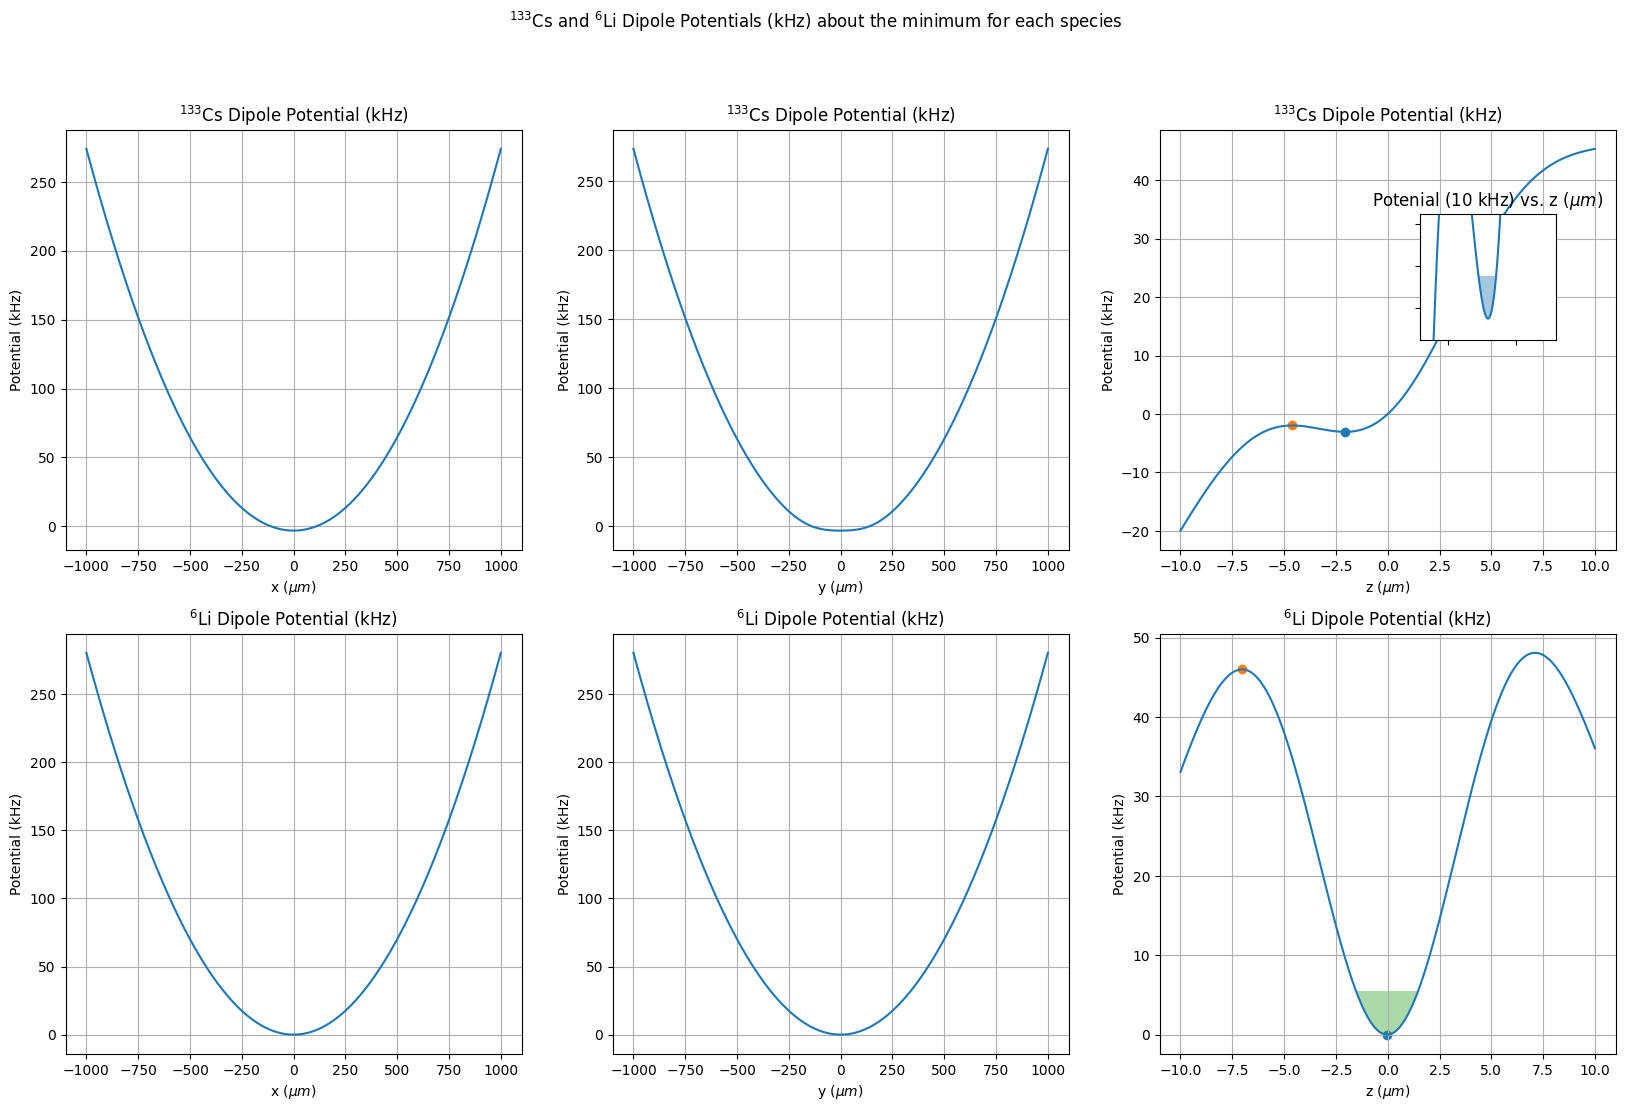

,parameter,Values
0,Cs min (μm),"[-0.0, -0.0, -2.06015]"
1,Cs trap depth (kHz),1.093584
2,Cs trap frequency (kHz),"[0.00628, 0.00383, 0.2787]"
3,Cs chemical potential (kHz),0.204333
4,Cs Fermi Radii (μm),"[28.0874, 46.0603, 0.6326]"
5,Cs atom density (atoms / μm^2),4.92087
6,,
7,Li min (μm),"[-0.0, -0.0, -0.02889]"
8,Li trap depth (kHz),46.003667
9,Li trap frequency (kHz),"[0.03069, 0.03068, 2.93104]"


In [361]:
#Final Trap Parameters

#electric field parameters
field_args = (30e-3, 200e-6, 10e-6) #power, min beam width in y, min beam width in z

#Cesium 133 parameters"
gamma_cs = Cs133.D2.Gamma
lambda_laser_cs = Constants.Lambda635
lambda_D1_cs = Cs133.D1.wavelength
lambda_D2_cs = Cs133.D2.wavelength

cs_dipole_potential_params = [gamma_cs, lambda_laser_cs, lambda_D1_cs, lambda_D2_cs]
cs_gj = Cs133.GS.g_j
cs_mass = Cs133.mass

#Lithium 6 parameters
gamma_li = Li6.D2.Gamma
lambda_laser_li = Constants.Lambda635
lambda_D1_li = Li6.D1.wavelength
lambda_D2_li = Li6.D2.wavelength

li_dipole_potential_params = (gamma_li, lambda_laser_li, lambda_D1_li, lambda_D2_li)
li_gj = (Li6.GS.g_j)
li_mass = (Li6.mass)

#normal, trap potential params
cs_trap_params = (field_args, cs_dipole_potential_params, cs_gj, cs_mass)
li_trap_params = (field_args, li_dipole_potential_params, li_gj, li_mass)
normal_trap_params = [cs_trap_params, li_trap_params]


class Trap_Calc():
    """
    Class for doing dipole trap calculations and producing plots of the potentials for Lithium and cesium

    inputs:
        - potentials (list): list of functions for calculating the potentials of Cs and Li (Hz)
        - NCs: number of cesium atoms
        - NLi: number of lithium atoms
        - plot_ranges: ranges for plotting (see plot_total_potential function)
    
    returns:
        - plot: potentials in x,y,z with min and max marked and chemical potential in z shaded in
        - min (microns): location of potential minimums for both species
        - trap depth (kHz): max - min for both species
        - trap frequency (kHz): frequency in x,y, and z for both species
        - chemical potential (kHz): chemical potential for both species
        - atom density (atoms / microns^2):
    """
    
    def __init__(self, potentials, NCs, NLi, plot_ranges):
        self.potentials = potentials
        self.cs_poten, self.li_poten = self.potentials

        self.gen_results(NCs, NLi, plot_ranges)
        

    def trap_depth_calc(self, potential, max_bnds, min_bnds, x0_max):
        """
        Function for computing the minimum and trap depth of a potential

        inputs:
            - poten_fun (def): trap potential
        
        returns (list): [min_pos (m), min_poten (kHz), max_pos (m), max_poten (kHz), trap_depth (KHz)]

        """
        #define a new objective function and inverse obejective function
        obj_fun = lambda r: potential(r*1e-6)
        inv_obj_fun = lambda r: -potential(r*1e-6) #inverse of the potential which we minimize to get the maximum

        #find min and max
        min_res = sp.optimize.minimize(obj_fun, x0=[0,0,0], bounds=min_bnds)
        max_res = sp.optimize.minimize(inv_obj_fun, x0=x0_max, bounds=max_bnds)

        min_pos = min_res['x'] * 1e-6
        max_pos = max_res['x'] * 1e-6

        min_poten = min_res['fun'] * 1e-3
        max_poten = -max_res['fun'] * 1e-3

        trap_depth = max_poten - min_poten

        return [min_pos, min_poten, max_pos, max_poten, trap_depth]


    def trap_frequency(self, potential, trap_bottom, mass):
        """
        Function for computing trap frequencies

        Inputs:
            potential_func: function for computing the potential
            trap_params: relevant trap parameters
            trap_bottom: location of the potential minimum (in meters)
            mass: atomic mass in kg

        returns: trap frequency: frequency values in x, y, and z in Hz

        """
        h1 = 1e-6 #step size in meters

        #compute the value of second derivatives in each direction at the trap bottom using both step sizes
        d2udx2 = partial_second_derivative(fun=potential, r=trap_bottom, dir='x', h=h1)
        d2udy2 = partial_second_derivative(fun=potential, r=trap_bottom, dir='y', h=h1)
        d2udz2 = partial_second_derivative(fun=potential, r=trap_bottom, dir='z', h=h1)

        #compute the trap frequency in each direction
        fx = np.sqrt( (d2udx2 * Constants.h) / mass ) / (2 * np.pi)
        fy = np.sqrt( (d2udy2 * Constants.h) / mass ) / (2 * np.pi)
        fz = np.sqrt( (d2udz2 * Constants.h) / mass ) / (2 * np.pi)

        return [fx, fy, fz]


    def gen_results(self, NCs, NLi, plot_ranges):
        """
        Function for generating plots of the potentials and a dataframe of the relevant results

        inputs:
            - trap_params (list): trap parameters for cesium and lithium
            - NCs (float): the number of cs atoms
            - NLi (float): the number of lithium atoms
            - plot_ranges (list): ranges for plotting (see plot_total_potential function)

        returns:
            - plot: potentials in x,y,z with min and max marked and chemical potential in z shaded in
            - Curent beam parameters - power (W), beam waists in y and z (microns)
            - min (microns): location of potential minimums for both species
            - trap depth (kHz): max - min for both species
            - trap frequency (kHz): frequency in x,y, and z for both species
            - chemical potential (kHz): chemical potential for both species

        """
        #set bounds for minimization
        cs_min_bnds = ((-10, 10), (-10, 10), (-3, 4))
        cs_max_bnds = ((-10, 10), (-10, 10), (-25, -3))
        cs_x0_max = [0,0,-10]

        li_min_bnds = ((-10, 10), (-10, 10), (-4, 4))
        li_max_bnds = ((-10, 10), (-10, 10), (-25, -3))
        li_x0_max = [0,0,-10]

        #minimize the potential for each species
        cs_min_pos, cs_min_poten, cs_max_pos, cs_max_poten, cs_trap_depth = self.trap_depth_calc(self.cs_poten, cs_max_bnds, cs_min_bnds, cs_x0_max)
        li_min_pos, li_min_poten, li_max_pos, li_max_poten, li_trap_depth = self.trap_depth_calc(self.li_poten, li_max_bnds, li_min_bnds, li_x0_max)

        #get trap frequency
        cs_fx, cs_fy, cs_fz = self.trap_frequency(self.cs_poten, cs_min_pos, Cs133.mass)
        li_fx, li_fy, li_fz = self.trap_frequency(self.li_poten, li_min_pos, Li6.mass)

        #get the chemical potential
        bec_res = BEC_calc(cs_fx, cs_fy, cs_fz, NCs, Cs133.aBB, printRes=False)
        cs_chem_poten_temp = bec_res.results["chemical Potential (nK)"] #in nK
        cs_chem_poten_energy = cs_chem_poten_temp * Constants.kB * 1e-9 #in J
        cs_chem_poten_freq = cs_chem_poten_energy / Constants.h * 1e-3 #in kHz

        fermi_res = Fermi_calc(li_fx, li_fy, li_fz, NLi)
        li_chem_poten_temp = fermi_res.results["chemical Potential (nK)"] # in nK
        li_chem_poten_energy = li_chem_poten_temp * Constants.kB * 1e-9 #in J
        li_chem_poten_freq = li_chem_poten_energy / Constants.h * 1e-3 #in kHz

        #get the thomas fermi radii for both
        tfr_cs = bec_res.results["Thomas-Fermi Radius (m)"]
        tfr_x_cs = tfr_cs[0] * 1e6 #microns
        tfr_y_cs = tfr_cs[1] * 1e6 #microns

        tfr_li = fermi_res.results["Thomas-Fermi Radius (m)"]
        tfr_x_li = tfr_li[0] * 1e6 #microns 
        tfr_y_li = tfr_li[1] * 1e6 #microns

        #compute the atom density of each gas in the x-y plane
        cs_area = tfr_x_cs * tfr_y_cs * np.pi
        cs_density = NCs/cs_area

        li_area = tfr_x_li * tfr_y_li * np.pi
        li_density = NLi/li_area


        #make plots
        cs_trap = [cs_min_poten, cs_max_poten, cs_max_pos]
        li_trap = [li_min_poten, li_max_poten, li_max_pos]
        chem_potentials = [cs_chem_poten_freq, li_chem_poten_freq]
        trap = [cs_trap, li_trap, chem_potentials]
        const_vals = [cs_min_pos, li_min_pos]
        title = r'$^{133}$Cs and $^{6}$Li Dipole Potentials (kHz) about the minimum for each species'

        plot_total_potential(potens=self.potentials, ranges=plot_ranges, const_vals=const_vals, main_title=title, trap=trap)
        plt.show()


        #collect results
        results = {
            'Cs min (\u03bcm)': [round(num*1e6, 5) for num in cs_min_pos],
            'Cs trap depth (kHz)': cs_trap_depth,
            'Cs trap frequency (kHz)': [round(cs_fx/1000, 5), round(cs_fy/1000, 5), round(cs_fz/1000, 5)],
            'Cs chemical potential (kHz)': cs_chem_poten_freq,
            'Cs Fermi Radii (\u03bcm)': [round(r*1e6, 5) for r in tfr_cs],
            'Cs atom density (atoms / \u03bcm^2)': round(cs_density, 5),
            "":"",
            'Li min (\u03bcm)': [round(num*1e6, 5) for num in li_min_pos],
            'Li trap depth (kHz)': li_trap_depth,
            'Li trap frequency (kHz)': [round(li_fx/1000, 5), round(li_fy/1000, 5), round(li_fz/1000, 5)],
            'Li Fermi Energy (kHz)': li_chem_poten_freq,
            'Li Fermi Radii (\u03bcm)': [round(r*1e6, 5) for r in tfr_li],
            'Li atom density (atoms / \u03bcm^2)': round(li_density, 5)
        }

        #generate dataframe for results
        params = []
        vals = []

        #sort each parameter and value into lists
        for key in results:
            params.append(key)
            vals.append(results[key])

        #create the dataframe
        df = pd.DataFrame.from_dict({
            "parameter": params,
            "Values":vals
        })

        #display the dataframe
        pd.set_option('display.max_colwidth', None)
        display(df)

plot_ranges = [1000e-6, 1000e-6, 10e-6]
NCs = 2e4
NLi = 1e4

B0_overlap = 0

#define potentials for each atom
cs_poten = Potential(cs_trap_params, B0_overlap)
li_poten = Potential(li_trap_params, B0_overlap)
potentials = [cs_poten.total_potential, li_poten.total_potential]

trap_calcs = Trap_Calc(potentials, NCs, NLi, plot_ranges)